In [1]:
import os
import numpy as np

import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import load_dataset_ot as ot
import load_dataset as load
from importlib import reload
import phase_calc_functions as phase_calc

# Loading Data

In [2]:
ot = reload(ot)
awap = ot.load_awap()

awap = awap.where(awap.time.dt.year.isin(np.arange(1950, 2030)), drop=True)
awap = awap.sel(lat=slice(-23, None))
awap

Opening awap data from /g/data/w40/ab2313/mjo_and_rainfall_trend/precip_calib_0.25_1911_2017_land.nc
Appling mask from /g/data/w40/ab2313/mjo_and_rainfall_trend/precip_calib_0.25_maskforCAus.nc


<xarray.Dataset>
Dimensions:  (time: 24837, lat: 49, lon: 161)
Coordinates:
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * time     (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2017-12-31
Data variables:
    precip   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...
    History:      AGCD Regrid on the 11th of June 2021 from /g/data/rr5 by ab...

In [3]:
ot = reload(ot)

# Oliver and Thompson RMM Index
rmm_ot = ot.load_ot_rmm()
rmm_ot = rmm_ot.where(rmm_ot.time.dt.year.isin(np.arange(1950, 2030)), drop=True)
rmm_ot

Opening OT RMM from /g/data/w40/ab2313/mjo_and_rainfall_trend/mjoindex_IHR_20CRV2c.nc


<xarray.Dataset>
Dimensions:    (time: 23741)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2014-12-31
Data variables:
    t_IHR      (time) float32 7.122e+05 7.122e+05 ... 7.36e+05 7.36e+05
    RMM1       (time) float32 1.745 1.27 0.7123 0.1644 ... 1.329 1.27 0.8695
    RMM2       (time) float32 0.6536 0.9263 1.068 ... -0.3652 -0.1545 0.3881
    amplitude  (time) float32 1.864 1.572 1.284 1.084 ... 1.378 1.279 0.9522
    phase      (time) float32 5.0 5.0 6.0 6.0 7.0 7.0 ... 4.0 4.0 4.0 4.0 5.0
Attributes:
    description:  Reconstructed MJO Index (1905-2014)
    author:       Eric Oliver, Ph.D., Dalhousie University
    date:         2016-Nov-04 14:28:34
    File_Name:    data/mjoindex_IHR.nc
    Title:        Reconstructed MJO Index (1905-2014)
    Source_File:

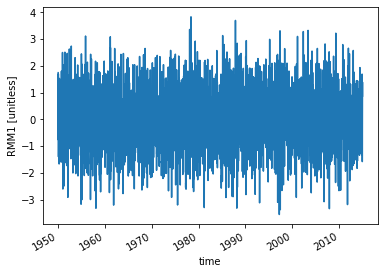

In [4]:
# Wheeler and Hendon RMM index
rmm_wh = load.load_rmm()
rmm_wh

<xarray.Dataset>
Dimensions:    (time: 17417)
Coordinates:
  * time       (time) datetime64[ns] 1974-06-01 1974-06-02 ... 2022-02-05
Data variables:
    RMM1       (time) float64 1.634 1.603 1.516 1.51 ... 0.272 0.2469 0.0906
    RMM2       (time) float64 1.203 1.015 1.086 ... -0.6547 -0.7282 -0.8321
    phase      (time) int64 5 5 5 5 5 6 6 6 6 7 6 5 ... 8 8 7 7 7 6 5 4 3 3 3 3
    amplitude  (time) float64 2.029 1.897 1.865 1.831 ... 0.709 0.7689 0.837

In [123]:
rmm_wh = rmm_wh.where(rmm_wh.RMM1 < 10)

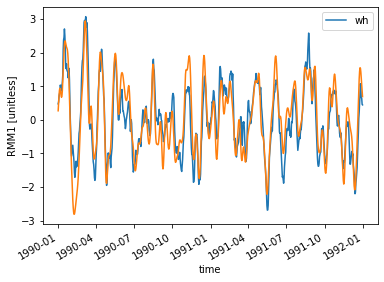

In [129]:
rmm_wh.RMM1.where(rmm_wh.time.dt.year.isin([1990, 1991])).plot(label='wh')
rmm_ot.RMM1.where(rmm_ot.time.dt.year.isin([1990, 1991])).plot()
plt.legend()

# Phase Splitting and Wet Season Calibration

Splitting into different MJO phases (1-8) and then moving the data from Jan-March back one year. The moving of the data back one year means that all of the data for an individual wet season is now with in the one year. This makes resampling much easier.

In [5]:
# Readjusting the years, so when a resample takes plact, it is just the data for one wet season. If 
# this was not done it would be the end half of one wet season and the start of another. This moves that data
# from the start of the wet season back or forwards a year (I don't remember), so that they line up

phase_calc = reload(phase_calc)
awap_ws = phase_calc.wet_season_year(awap)
awap_ws

<xarray.Dataset>
Dimensions:  (time: 8245, lat: 49, lon: 161)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2018-12-31
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
Data variables:
    precip   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...
    History:      AGCD Regrid on the 11th of June 2021 from /g/data/rr5 by ab...

In [6]:
rmm_ot_ws = phase_calc.wet_season_year(rmm_ot)
rmm_ot_ws

<xarray.Dataset>
Dimensions:    (time: 7881)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2015-12-31
Data variables:
    t_IHR      (time) float32 7.122e+05 7.122e+05 ... 7.36e+05 7.36e+05
    RMM1       (time) float32 1.745 1.27 0.7123 0.1644 ... 1.329 1.27 0.8695
    RMM2       (time) float32 0.6536 0.9263 1.068 ... -0.3652 -0.1545 0.3881
    amplitude  (time) float32 1.864 1.572 1.284 1.084 ... 1.378 1.279 0.9522
    phase      (time) float32 5.0 5.0 6.0 6.0 7.0 7.0 ... 4.0 4.0 4.0 4.0 5.0
Attributes:
    description:  Reconstructed MJO Index (1905-2014)
    author:       Eric Oliver, Ph.D., Dalhousie University
    date:         2016-Nov-04 14:28:34
    File_Name:    data/mjoindex_IHR.nc
    Title:        Reconstructed MJO Index (1905-2014)
    Source_File:

In [7]:
# Spalitting AWAP into the the different phases of the Wheeler and Hendon MJO
awap_split_ot_ws = phase_calc.split_into_1to8(awap_ws.copy(deep=True), rmm_ot_ws)

In [8]:
awap_split_ot_ws

<xarray.Dataset>
Dimensions:  (time: 7881, phase: 9, lat: 49, lon: 161)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2015-12-31
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * phase    (phase) object '1' '2' '3' '4' '5' '6' '7' '8' 'inactive'
Data variables:
    precip   (phase, time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...
    History:      AGCD Regrid on the 11th of June 2021 from /g/data/rr5 by ab...

In [9]:
rmm_wh_ws = phase_calc.wet_season_year(rmm_wh)

# Splitting AWAP into the the different phases of the Wheeler and Hendon MJO
awap_split_wh_ws = phase_calc.split_into_1to8(awap_ws.copy(deep=True), rmm_wh_ws)

In [10]:
awap_split_ot_ws

<xarray.Dataset>
Dimensions:  (time: 7881, phase: 9, lat: 49, lon: 161)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2015-12-31
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * phase    (phase) object '1' '2' '3' '4' '5' '6' '7' '8' 'inactive'
Data variables:
    precip   (phase, time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...
    History:      AGCD Regrid on the 11th of June 2021 from /g/data/rr5 by ab...

In [11]:
awap_split_wh_ws

<xarray.Dataset>
Dimensions:  (time: 5199, phase: 9, lat: 49, lon: 161)
Coordinates:
  * time     (time) datetime64[ns] 1975-01-01 1975-01-02 ... 2018-12-31
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * phase    (phase) object '1' '2' '3' '4' '5' '6' '7' '8' 'inactive'
Data variables:
    precip   (phase, time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...
    History:      AGCD Regrid on the 11th of June 2021 from /g/data/rr5 by ab...

# Count

In [90]:
# This will conserve all extra dims - e.g. will return with lat, lon phase
awap_count_wh = awap_split_wh_ws.resample(time='Y').count(dim='time')
awap_count_wh

<xarray.Dataset>
Dimensions:  (time: 44, phase: 9, lat: 49, lon: 161)
Coordinates:
  * time     (time) datetime64[ns] 1975-12-31 1976-12-31 ... 2018-12-31
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * phase    (phase) object '1' '2' '3' '4' '5' '6' '7' '8' 'inactive'
Data variables:
    precip   (time, phase, lat, lon) int64 0 0 1 3 3 4 4 6 7 ... 0 0 0 0 0 0 0 0

In [91]:
awap_count_ot = awap_split_ot_ws.resample(time='Y').count(dim='time')
awap_count_ot

<xarray.Dataset>
Dimensions:  (time: 66, phase: 9, lat: 49, lon: 161)
Coordinates:
  * time     (time) datetime64[ns] 1950-12-31 1951-12-31 ... 2015-12-31
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * phase    (phase) object '1' '2' '3' '4' '5' '6' '7' '8' 'inactive'
Data variables:
    precip   (time, phase, lat, lon) int64 0 0 1 1 1 1 1 0 0 ... 0 0 0 0 0 0 0 0

In [92]:
phase_calc = reload(phase_calc)
phase_count_ot = phase_calc.count_in_rmm_phase(rmm_ot_ws)
# phase_count_ot = phase_count_ot.rename({'year': 'time'})
phase_count_ot

<xarray.Dataset>
Dimensions:  (phase: 9, time: 66)
Coordinates:
  * phase    (phase) <U8 '1' '2' '3' '4' '5' '6' '7' '8' 'inactive'
  * time     (time) datetime64[ns] 1950-12-31 1951-12-31 ... 2015-12-31
Data variables:
    number   (phase, time) int64 6 11 15 7 16 5 6 6 6 ... 15 58 25 45 38 24 66 1

In [93]:
phase_count_wh = phase_calc.count_in_rmm_phase(rmm_wh_ws)
# phase_count_wh = phase_count_wh.rename({'year': 'time'})
phase_count_wh

<xarray.Dataset>
Dimensions:  (phase: 9, time: 48)
Coordinates:
  * phase    (phase) <U8 '1' '2' '3' '4' '5' '6' '7' '8' 'inactive'
  * time     (time) datetime64[ns] 1975-12-31 1976-12-31 ... 2022-12-31
Data variables:
    number   (phase, time) int64 12 0 6 11 6 0 6 9 1 ... 29 18 56 15 23 46 40 21

In [94]:
# More interested in the sub phase, and not the phases
awap_count_sub_ot = phase_calc.resample_phase_to_subphase(awap_count_ot)
awap_count_sub_wh = phase_calc.resample_phase_to_subphase(awap_count_wh)
phase_count_wh_sub = phase_calc.resample_phase_to_subphase(phase_count_wh)
phase_count_ot_sub = phase_calc.resample_phase_to_subphase(phase_count_ot)

In [95]:
awap_count_sub_ot

<xarray.Dataset>
Dimensions:  (time: 66, phase: 4, lat: 49, lon: 161)
Coordinates:
  * time     (time) datetime64[ns] 1950-12-31 1951-12-31 ... 2015-12-31
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, time, lat, lon) int64 0 0 2 3 2 4 4 4 4 ... 0 0 0 0 0 0 0 0

In [96]:
phase_count_ot_sub

<xarray.Dataset>
Dimensions:  (phase: 4, time: 66)
Coordinates:
  * time     (time) datetime64[ns] 1950-12-31 1951-12-31 ... 2015-12-31
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    number   (phase, time) int64 30 32 30 16 33 39 18 43 ... 58 25 45 38 24 66 1

In [97]:
awap_count_frac_ot = awap_count_sub_ot.precip/phase_count_ot_sub.number
awap_count_frac_ot.name = 'fraction'


awap_count_frac_wh = awap_count_sub_wh.precip/phase_count_wh_sub.number
awap_count_frac_wh.name = 'fraction'

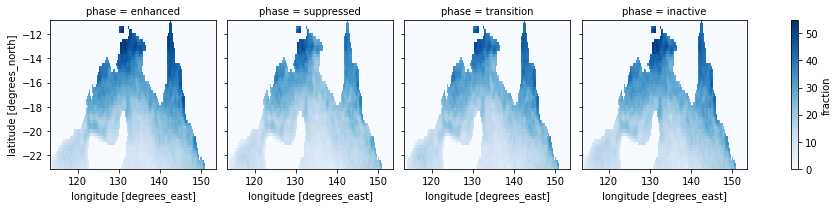

In [98]:
awap_count_frac_ot.sum(dim='time').plot(x='lon', y='lat', col='phase', cmap='Blues')

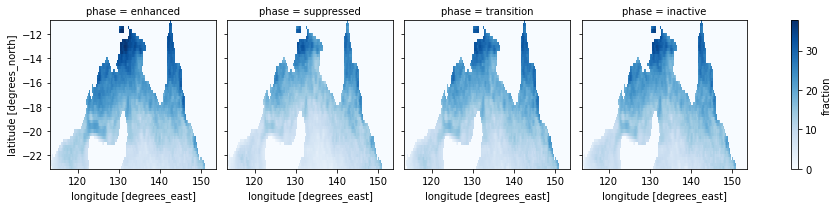

In [99]:
awap_count_frac_wh.sum(dim='time').plot(x='lon', y='lat', col='phase', cmap='Blues')

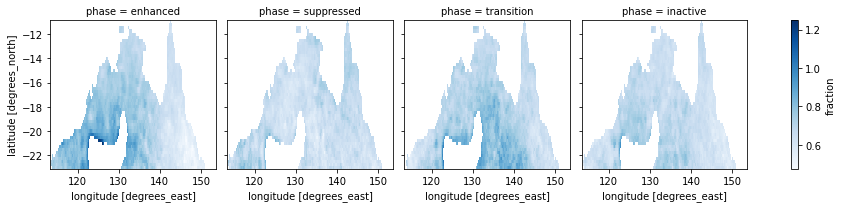

In [100]:
(awap_count_frac_wh.sum(dim='time')/awap_count_frac_ot.sum(dim='time')).plot(x='lon', y='lat', col='phase', cmap='Blues')

In [101]:
# awap_count_sub_ot['time'] = awap_count_sub_ot.time.dt.year
# awap_count_sub_ot = awap_count_sub_ot.rename({'time':'year'})

# awap_count_sub_wh['time'] = awap_count_sub_wh.time.dt.year
# awap_count_sub_wh = awap_count_sub_wh.rename({'time':'year'})

In [103]:
awap_count_frac_ot

<xarray.DataArray 'fraction' (phase: 4, time: 66, lat: 49, lon: 161)>
array([[[[0.        , 0.        , 0.06666667, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.03333333, 0.03333333, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
...
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]])
Coordinates:
  * time     (time) datetime64[ns] 1950-12-31 1951-12-31 ... 2015-12-31
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'

In [104]:
# Trend that is normalised by the number of days in each phase
data = awap_count_frac_ot.copy(deep=True)
data['time'] = data.time.dt.year
data = data.rename({'time':'year'})
data

<xarray.DataArray 'fraction' (phase: 4, year: 66, lat: 49, lon: 161)>
array([[[[0.        , 0.        , 0.06666667, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.03333333, 0.03333333, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
...
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]])
Coordinates:
  * year     (year) int64 1950 1951 1952 1953 1954 ... 2011 2012 2013 2014 2015
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'

In [105]:
phase_calc = reload(phase_calc)
trend_count_sub_norm, trend_sig_count_sub_norm, trend_percent_count_sub_norm, trend_percent_sig_count_sub_norm = \
    phase_calc.return_alltrendinfo_custom(data)

calculating trend: complete
converting to percent per decade: complete
finding significant points: complete
getting just significant trend points: complete


In [106]:
import map_trend_functions as mapTrend

In [110]:
vmax = 20
step = 4

In [114]:
image_dir = '../images/mjo_and_rainfall_trend_images/'

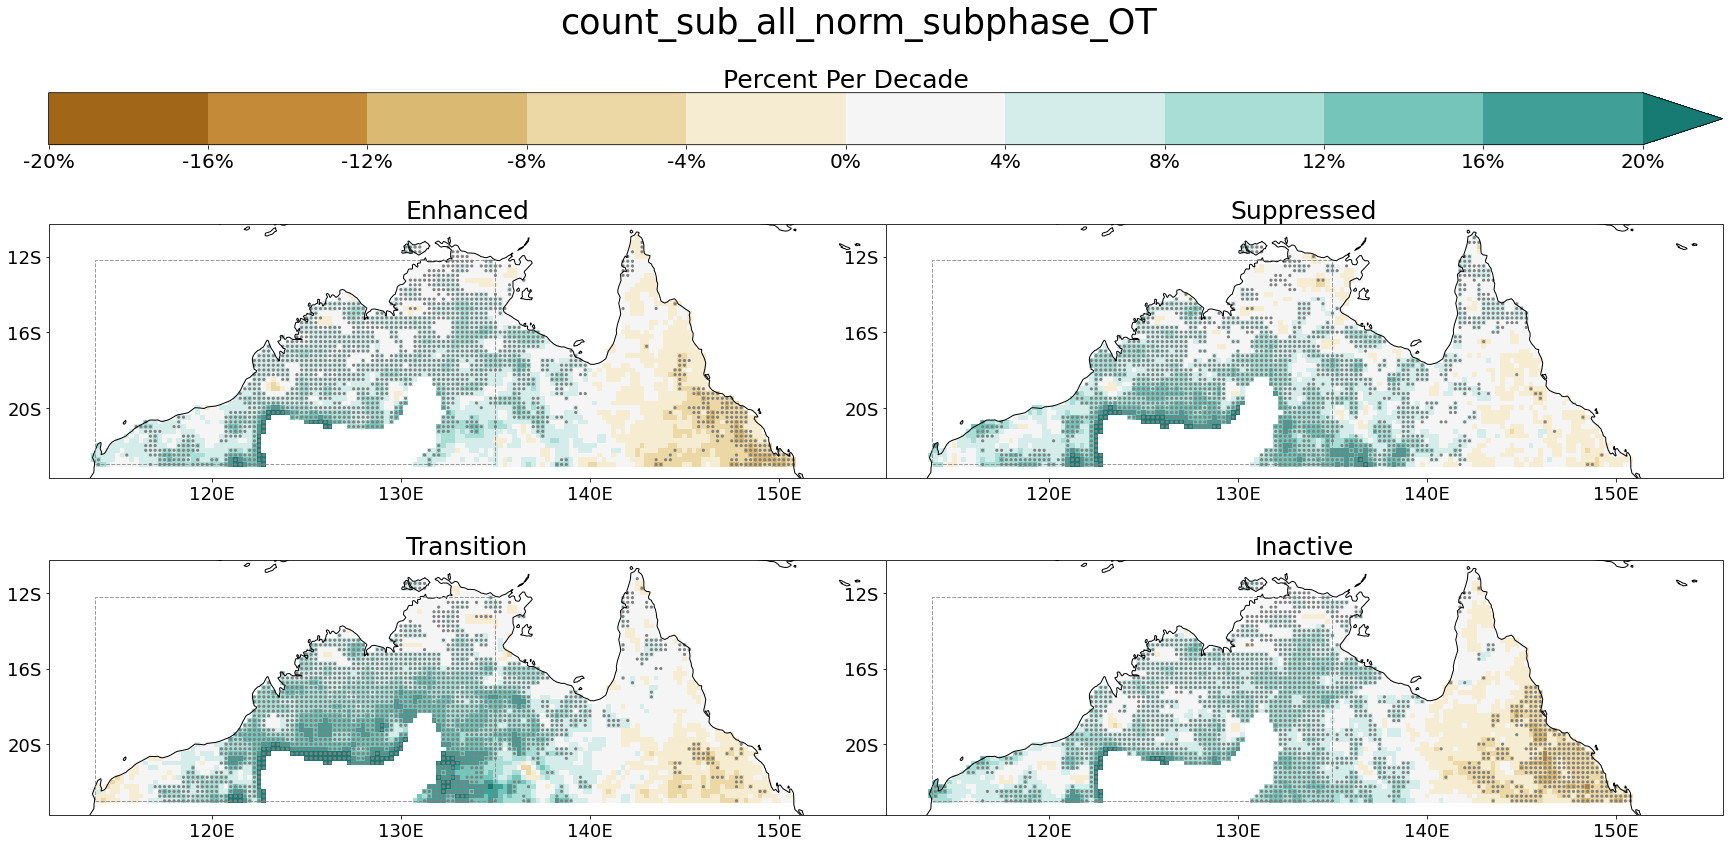

In [117]:
mapTrend = reload(mapTrend)
mapTrend.trend_plots(trend_percent_count_sub_norm.trend, stip_data = trend_percent_sig_count_sub_norm.trend,
               vmax = vmax, step = step, sig_size = 4.5, cmap = 'BrBG',
               title = 'count_sub_all_norm_subphase_OT', colorbar_title = 'Percent Per Decade'
               ,savedir = image_dir
            )

# fig.savefig('OT_rainfall_fraction_trend.png', bbox_inches='tight')